# Playing MIDI from jupyter notebook

Experiments on different ways to play MIDI files generated from music21.

1. Use Music21 (with pygame and timidity) to stream player
2. Use fluidsynth to convert midi to wav. Then use IPython.diplay.Audio to play sound


In [1]:
from pathlib import Path
from IPython.display import Audio

#### Sanity Check
Download test audio here - https://s3-us-west-2.amazonaws.com/ashaw-fastai-imagenet/Titanium.mp3

In [2]:
sound_file = Path('Titanium.mp3')
Audio(str(sound_file))

Download midi file here - https://s3-us-west-2.amazonaws.com/ashaw-fastai-imagenet/happy_birthday.mid

In [3]:
midi_file = Path('happy_birthday.mid')

### Using FluidSynth - Convert to Audio

Must install the following for sound support.
Fluidsynth is a soundfont synthesizer. 
Timidity is also another option. 
`fluid-soundfont-gs` gets installed to `/usr/share/sounds/sf2`.  
You must be sure to configure fluidsynth/timidity to use those soundfonts.
```
sudo apt-get install fluidsynth
sudo apt-get install fluid-soundfont-gs
```

Python interface for fluidsynth - [midi2audio](https://pypi.org/project/midi2audio/)
```
pip install midi2audio
```

In [4]:
from midi2audio import FluidSynth

In [5]:
sound_font = '/usr/share/sounds/sf2/FluidR3_GM.sf2'

In [6]:
out_file = 'test_out_3.wav'

In [7]:
player = FluidSynth(sound_font)

In [8]:
# player.play_midi(str(midi_file)) # does not work

In [9]:
player.midi_to_audio(str(midi_file), out_file)

In [10]:
Audio(str(out_file))

### Music21 Tests - WORKS

Install music21 - `pip install music21`

Other libraries I tried and might help. pygame and timidity are required to play sounds directly from music21 - couldn't get this to work. 
Seems like jupyter notebooks on a server have trouble playing audio in general. Even if you set the sound font. Have to save it locally and use IPython.display.Audio
```
pip install pygame
sudo apt-get install timidity
```

Installing custom soundfonts:  
https://wiki.archlinux.org/index.php/timidity  


In [11]:
from music21 import *

In [12]:
mf = midi.MidiFile()
mf.open(midi_file)
mf.read()
mf.close()
s = midi.translate.midiFileToStream(mf)

In [13]:
# sp = midi.realtime.StreamPlayer(s)
# sp.play() # does not work

In [14]:
s.show('midi')

### Alternatively

In [15]:
b = corpus.parse('bach/bwv66.6')
# sp = midi.realtime.StreamPlayer(b)

In [16]:
b.show('midi')

In [17]:
# sp.play()

### Music21 displaying graphics with lilypond

Lilypond is a midi to score library.  
You will also need to install a graphics renderer - musescore is a good choice
```
sudo apt-get install lilypond
sudo apt-get install musescore
```

To fix error (taken from [here](https://github.com/jantman/biweeklybudget/issues/62)):  
```
QFontDatabase: Cannot find font directory /usr/lib/x86_64-linux-gnu/fonts - is Qt installed correctly?
```


```
sudo ln -s /usr/share/fonts /usr/lib/x86_64-linux-gnu/fonts
```



In [18]:
import music21

In [19]:
music21.environment.set("musicxmlPath", "/usr/bin/musescore")
music21.environment.set("graphicsPath", "/usr/bin/musescore")

In [25]:
import os
# https://github.com/ContinuumIO/anaconda-issues/issues/1806
os.environ['QT_QPA_PLATFORM']='offscreen'

In [21]:
from IPython.display import Image
c = chord.Chord("C4 E4 G4")

In [29]:
environment.get('musescoreDirectPNGPath')

In [33]:
environment.get('musescoreDirectPNGPath')

In [24]:
# https://groups.google.com/forum/#!topic/music21list/BC6DsaUQlTQ
path = '/home/paperspace/music_rnn/musescore-xvfb'
# path = '/usr/bin/musescore-xvfb'
environment.set('musescoreDirectPNGPath', path)
environment.set('musicxmlPath', path)

UserSettingsException: attempting to set a value to a path that does not exist: /home/paperspace/music_rnn/musescore-xvfb

In [30]:
import matplotlib.pyplot as plt

In [28]:
c.write('lily.png', fp='test')

PosixPath('test.png')

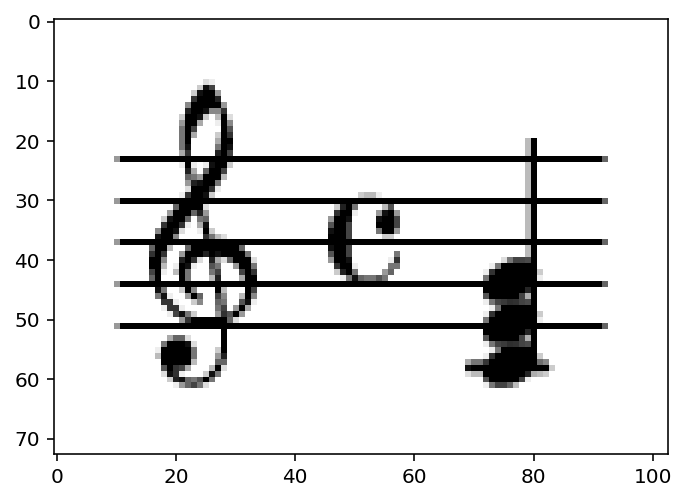

In [32]:
plt.imshow(plt.imread('test.png'))

In [26]:
c.show('lily.png')

In [30]:
c.show('midi')

In [14]:
Image(filename=c.write('lily.png'))

### Try out pygame (music21 uses on backend)

In [33]:
import pygame
pygame.mixer.pre_init(44100, -16, 2, 2048)
pygame.init()
pygame.mixer.music.set_volume(0.8)
# screen = pygame.display.set_mode((640, 480))

pygame.mixer.music.load('Titanium.mp3')
pygame.mixer.music.play()